In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_df = pd.read_csv('cancer.csv')
display(raw_df)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


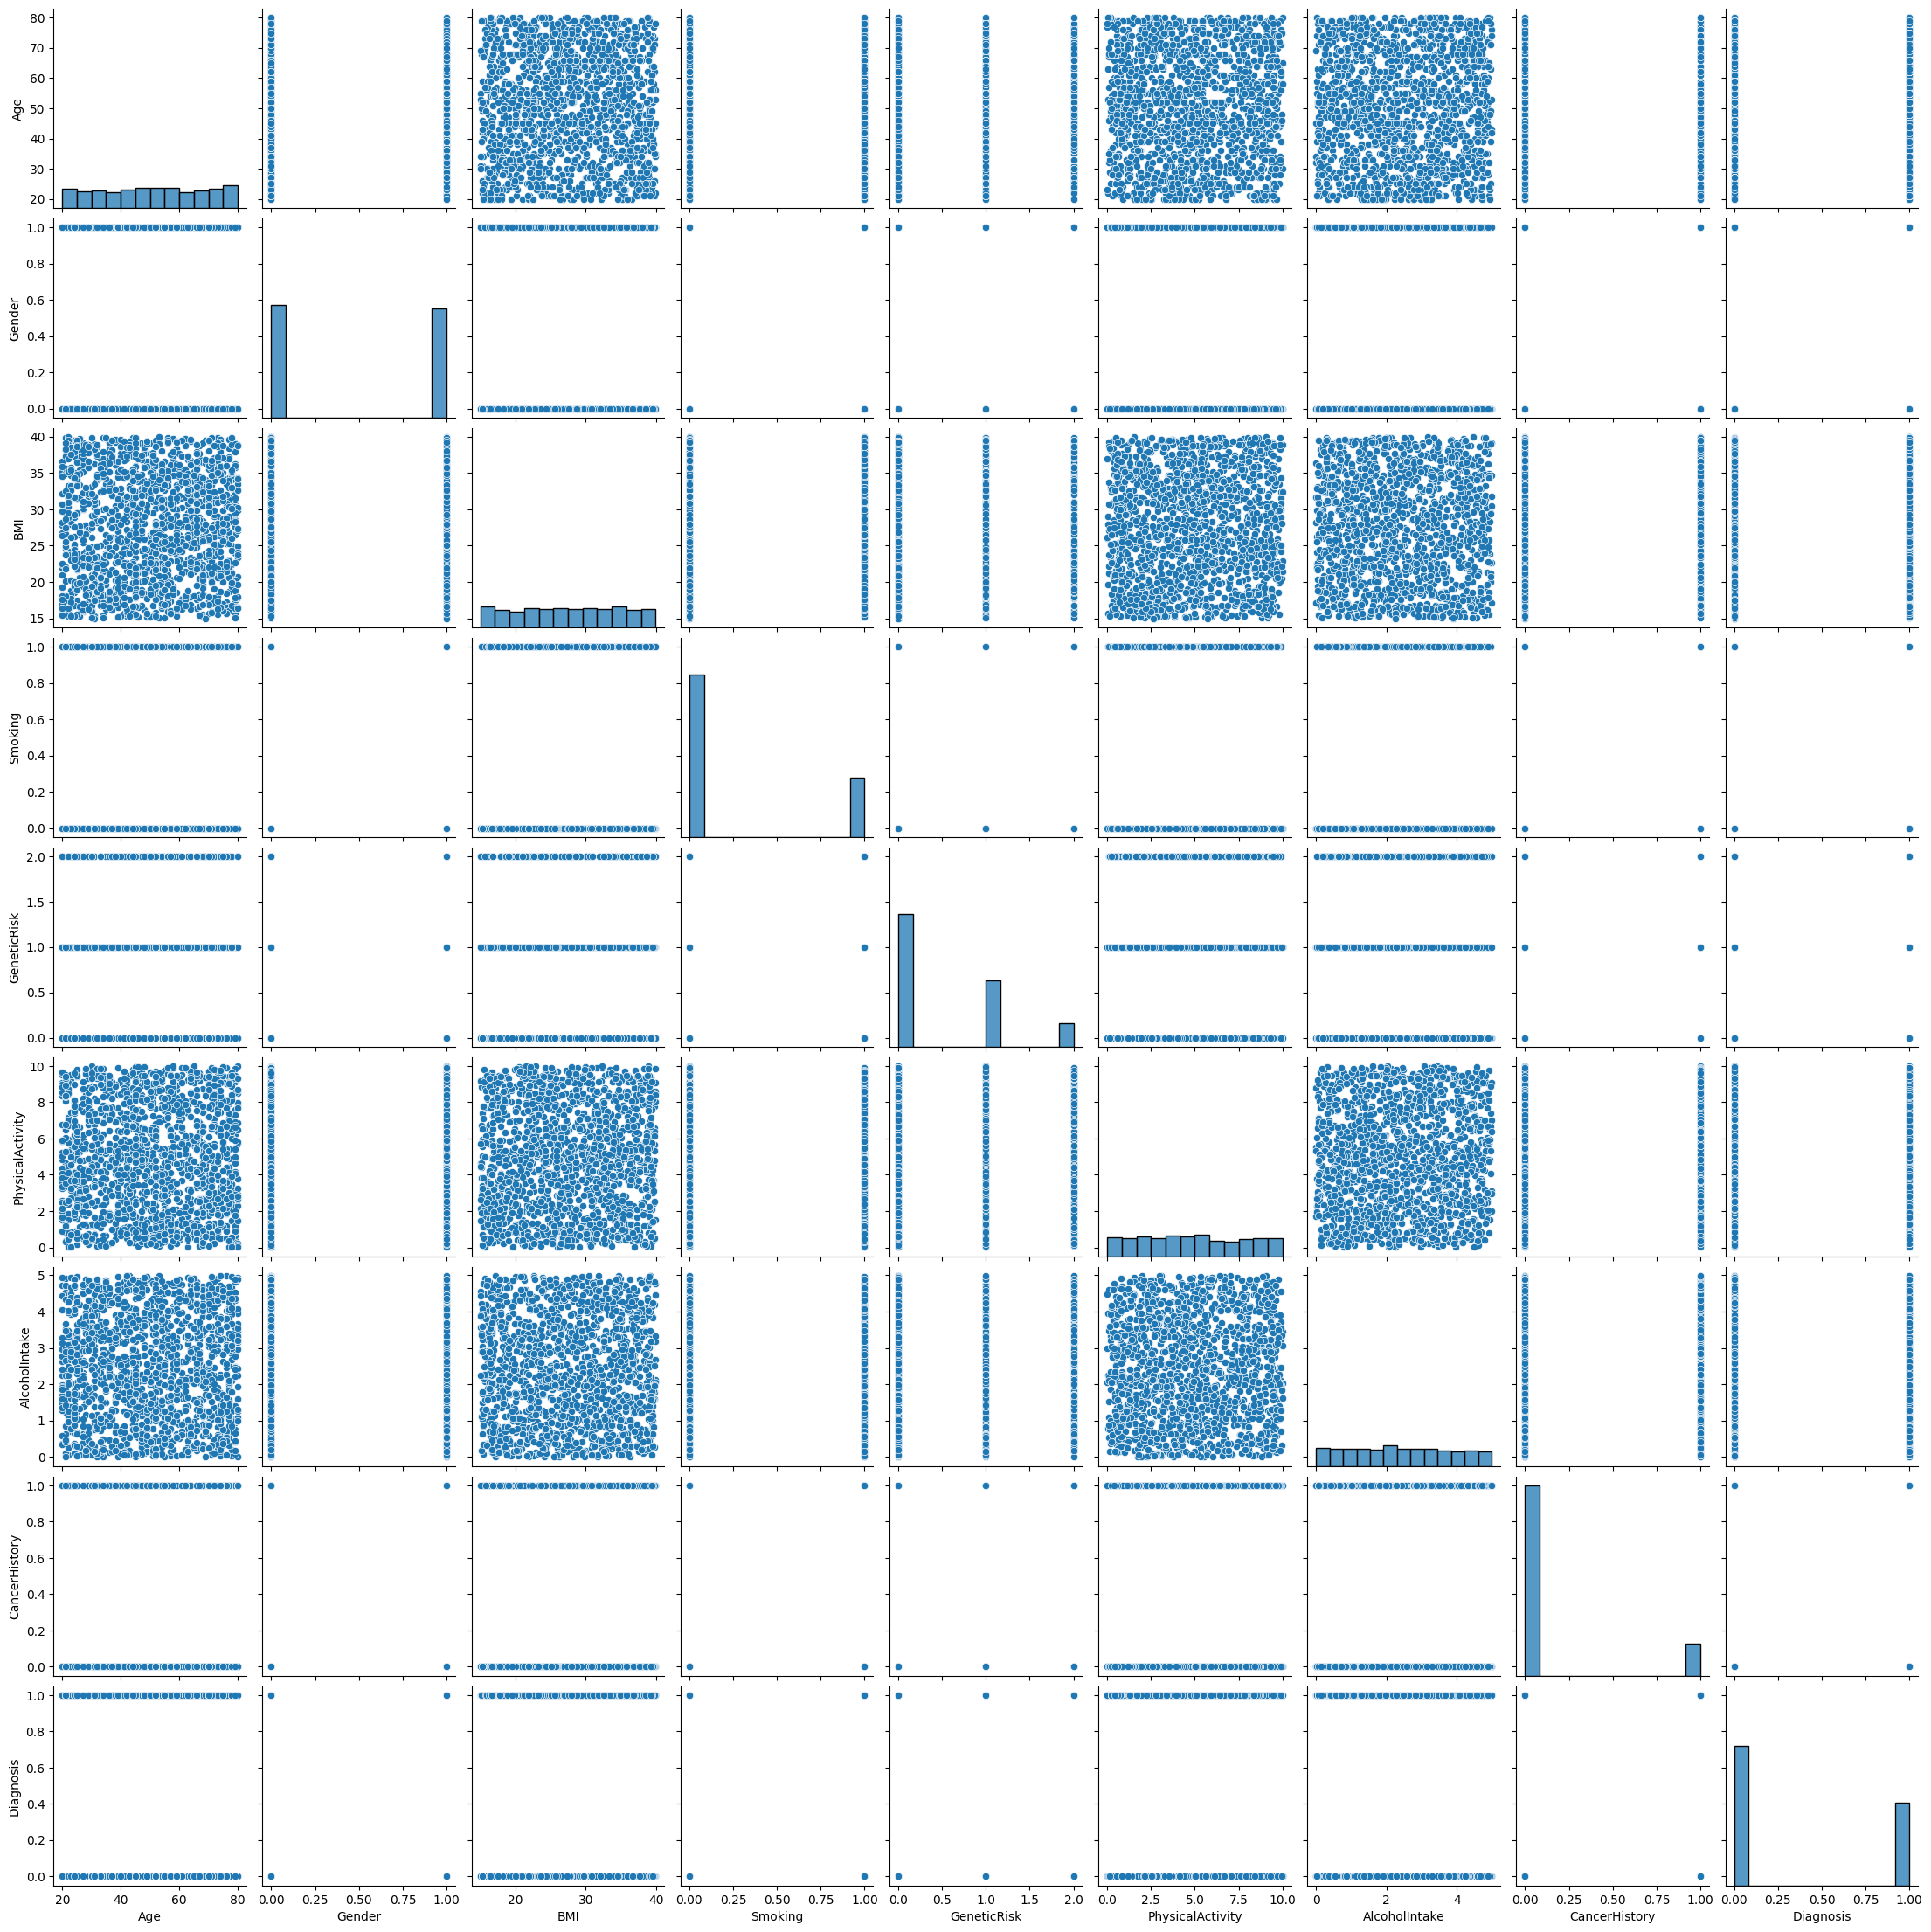

In [4]:
# Build a pairplot for the dataset
sns.pairplot(raw_df)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = raw_df.drop('Diagnosis', axis=1)
y = raw_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
y_test

127     0
528     0
803     1
1409    1
727     1
       ..
1255    1
571     0
663     1
52      0
609     0
Name: Diagnosis, Length: 300, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully")


Logistic Regression trained successfully
Random Forest trained successfully
XGBoost trained successfully
SVM trained successfully


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_prob))



Logistic Regression
Accuracy: 0.84
Precision: 0.752
Recall: 0.8468468468468469
F1: 0.7966101694915254
ROC-AUC: 0.9173459173459173

Random Forest
Accuracy: 0.94
Precision: 0.9603960396039604
Recall: 0.8738738738738738
F1: 0.9150943396226415
ROC-AUC: 0.9650841317507985

XGBoost
Accuracy: 0.9366666666666666
Precision: 0.9339622641509434
Recall: 0.8918918918918919
F1: 0.9124423963133641
ROC-AUC: 0.9623909623909624

SVM
Accuracy: 0.6633333333333333
Precision: 0.5390625
Recall: 0.6216216216216216
F1: 0.5774058577405857
ROC-AUC: 0.738714905381572


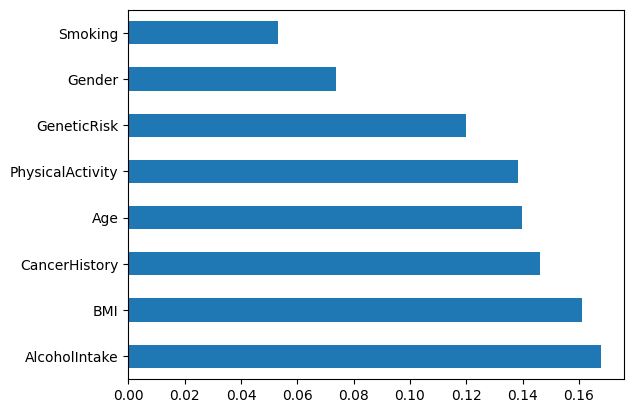

In [9]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(models['Random Forest'].feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
# import shap
# explainer = shap.TreeExplainer(models['XGBoost'])
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)

Explanation of logistic regression 

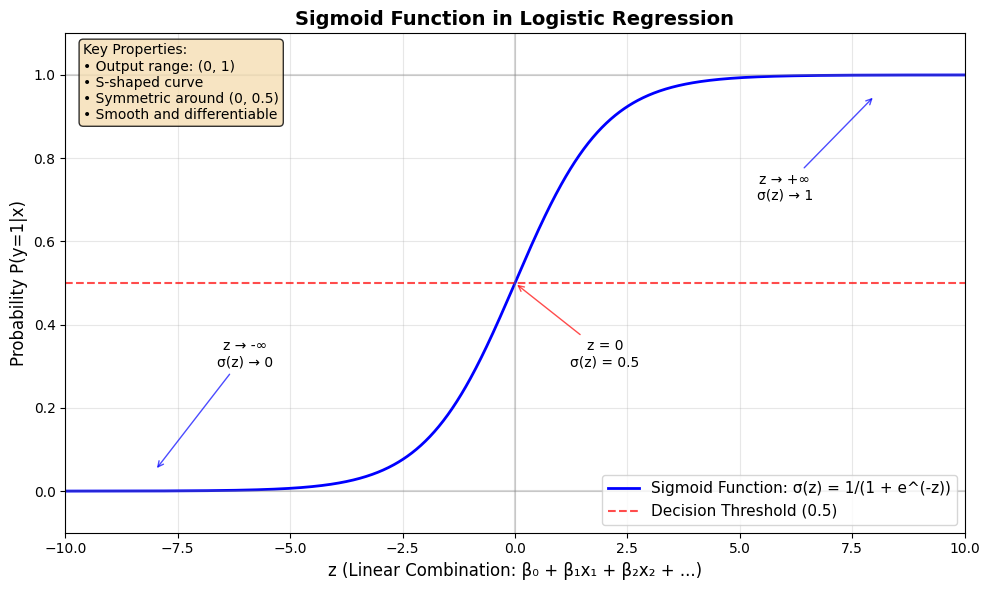

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate x values (z values in logistic regression)
z = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(z)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z, y_sigmoid, 'b-', linewidth=2, label='Sigmoid Function: σ(z) = 1/(1 + e^(-z))')

# Add horizontal lines for key points
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='gray', linestyle='-', alpha=0.3)

# Add vertical line at z=0
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)

# Add annotations
plt.annotate('z = 0\nσ(z) = 0.5', xy=(0, 0.5), xytext=(2, 0.3),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center')

plt.annotate('z → +∞\nσ(z) → 1', xy=(8, 0.95), xytext=(6, 0.7),
            arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
            fontsize=10, ha='center')

plt.annotate('z → -∞\nσ(z) → 0', xy=(-8, 0.05), xytext=(-6, 0.3),
            arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
            fontsize=10, ha='center')

# Customize the plot
plt.xlabel('z (Linear Combination: β₀ + β₁x₁ + β₂x₂ + ...)', fontsize=12)
plt.ylabel('Probability P(y=1|x)', fontsize=12)
plt.title('Sigmoid Function in Logistic Regression', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)

# Add text box explaining the function
textstr = 'Key Properties:\n• Output range: (0, 1)\n• S-shaped curve\n• Symmetric around (0, 0.5)\n• Smooth and differentiable'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


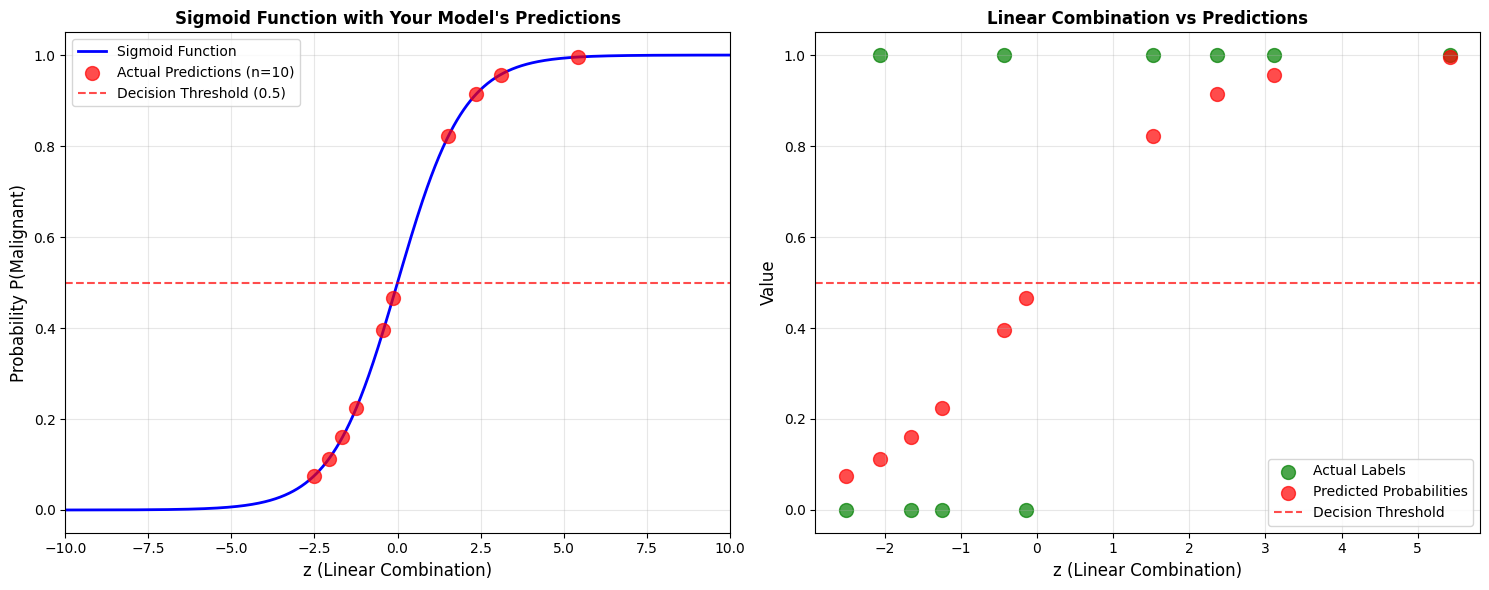

Sample Predictions from Your Logistic Regression Model:
Sample 1:
  Linear combination (z): -1.246
  Sigmoid output (probability): 0.223
  Predicted: Benign (prob: 0.223)
  Actual: Benign
  Correct: ✓

Sample 2:
  Linear combination (z): -0.140
  Sigmoid output (probability): 0.465
  Predicted: Benign (prob: 0.465)
  Actual: Benign
  Correct: ✓

Sample 3:
  Linear combination (z): 3.107
  Sigmoid output (probability): 0.957
  Predicted: Malignant (prob: 0.957)
  Actual: Malignant
  Correct: ✓

Sample 4:
  Linear combination (z): -2.059
  Sigmoid output (probability): 0.113
  Predicted: Benign (prob: 0.113)
  Actual: Malignant
  Correct: ✗

Sample 5:
  Linear combination (z): 2.367
  Sigmoid output (probability): 0.914
  Predicted: Malignant (prob: 0.914)
  Actual: Malignant
  Correct: ✓



In [12]:
# Let's also visualize how the sigmoid function works with your actual logistic regression model
# Get the trained logistic regression model
lr_model = models['Logistic Regression']

# Get some sample predictions and their linear combinations
sample_X = X_test.iloc[:10]  # Take first 10 test samples
sample_y = y_test.iloc[:10]

# Get the linear combination (z = β₀ + β₁x₁ + β₂x₂ + ...)
# This is what goes into the sigmoid function
z_values = lr_model.decision_function(sample_X)
probabilities = lr_model.predict_proba(sample_X)[:, 1]  # Probability of class 1 (Malignant)

# Create a comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Sigmoid curve with actual data points
z_range = np.linspace(-10, 10, 1000)
sigmoid_curve = sigmoid(z_range)

ax1.plot(z_range, sigmoid_curve, 'b-', linewidth=2, label='Sigmoid Function')
ax1.scatter(z_values, probabilities, color='red', s=100, alpha=0.7, 
           label=f'Actual Predictions (n={len(z_values)})', zorder=5)
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
ax1.set_xlabel('z (Linear Combination)', fontsize=12)
ax1.set_ylabel('Probability P(Malignant)', fontsize=12)
ax1.set_title('Sigmoid Function with Your Model\'s Predictions', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(-10, 10)

# Plot 2: Show the relationship between z-values and actual predictions
ax2.scatter(z_values, sample_y, color='green', s=100, alpha=0.7, label='Actual Labels')
ax2.scatter(z_values, probabilities, color='red', s=100, alpha=0.7, label='Predicted Probabilities')
ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold')
ax2.set_xlabel('z (Linear Combination)', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_title('Linear Combination vs Predictions', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print some examples
print("Sample Predictions from Your Logistic Regression Model:")
print("=" * 60)
for i in range(min(5, len(z_values))):
    actual_label = "Malignant" if sample_y.iloc[i] == 1 else "Benign"
    predicted_prob = probabilities[i]
    predicted_label = "Malignant" if predicted_prob > 0.5 else "Benign"
    z_val = z_values[i]
    
    print(f"Sample {i+1}:")
    print(f"  Linear combination (z): {z_val:.3f}")
    print(f"  Sigmoid output (probability): {predicted_prob:.3f}")
    print(f"  Predicted: {predicted_label} (prob: {predicted_prob:.3f})")
    print(f"  Actual: {actual_label}")
    print(f"  Correct: {'✓' if actual_label == predicted_label else '✗'}")
    print()
